# Airline Fare Price Prediction

Using the dataset provided by [lalit_joshi](https://www.kaggle.com/datasets/lalitjoshi89/airlinepriceprediction)

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import unicodedata

In [3]:
# Loading "raw" data from csv for a quick glance
data = pd.read_csv(r'dataset/airlines_data.csv')
data.info

<bound method DataFrame.info of      ;Airline_Name;Date_of_Journey;Source;Destination;Dept_Time;Total_Stops;Duration_of_Flight;Arr_Time;Fare
0     0;AirAsia;26/02/2022;Kolkata;Mumbai;13:30;1 st...                                                     
1     1;AirAsia;26/02/2022;Kolkata;Mumbai;9:05;2 sto...                                                     
2     2;AirAsia;26/02/2022;Kolkata;Mumbai;16:15;1 st...                                                     
3     3;AirAsia;26/02/2022;Kolkata;Mumbai;23:40;1 st...                                                     
4     4;AirAsia;26/02/2022;Kolkata;Mumbai;20:00;1 st...                                                     
...                                                 ...                                                     
2016  2019;Vistara;10/7/22;Mumbai;Chennai;6:20;2 Sto...                                                     
2017  2020;Vistara;10/7/22;Mumbai;Chennai;11:25;2 St...                                         

## DATA CLEANING

The data comes in a excel file format which I re-exported as a csv directly from Excel (note this could have been done using python too.)

In the data we have 10 variables and 2021 features. But we get all in 1 column due to the file being delimeted by semicolon. Lets fix that!

In [4]:
# Loading the data  with necessary attribute to convert it correctly into a dataframe
df = pd.read_csv(r'dataset/airlines_data.csv', delimiter=';', thousands=' ')
df

,Unnamed: 0,Airline_Name,Date_of_Journey,Source,Destination,Dept_Time,Total_Stops,Duration_of_Flight,Arr_Time,Fare
0,0,AirAsia,26/02/2022,Kolkata,Mumbai,13:30,1 stop,07 h 05 m,20:35,3 379
1,1,AirAsia,26/02/2022,Kolkata,Mumbai,9:05,2 stop,13 h 10 m,22:15,3 379
2,2,AirAsia,26/02/2022,Kolkata,Mumbai,16:15,1 stop,08 h 20 m,0:35,3 379
3,3,AirAsia,26/02/2022,Kolkata,Mumbai,23:40,1 stop,06 h 55 m,6:35,3 379
4,4,AirAsia,26/02/2022,Kolkata,Mumbai,20:00,1 stop,10 h 35 m,6:35,3 379
...,...,...,...,...,...,...,...,...,...,...
2016,2019,Vistara,10/7/22,Mumbai,Chennai,6:20,2 Stop,13h 55m,20:15,15 192
2017,2020,Vistara,10/7/22,Mumbai,Chennai,11:25,2 Stop,11h 20m,22:45,16 442
2018,2021,Vistara,10/7/22,Mumbai,Chennai,6:45,2 Stop,13h 30m,20:15,16 442
2019,2022,Vistara,10/7/22,Mumbai,Chennai,9:05,2 Stop,11h 10m,20:15,17 282


In [5]:
# Observing data types
df.dtypes

Unnamed: 0             int64
Airline_Name          object
Date_of_Journey       object
Source                object
Destination           object
Dept_Time             object
Total_Stops           object
Duration_of_Flight    object
Arr_Time              object
Fare                  object
dtype: object

In [6]:
# Checking for missing values
df.isnull().sum()

Unnamed: 0            0
Airline_Name          0
Date_of_Journey       0
Source                0
Destination           0
Dept_Time             0
Total_Stops           0
Duration_of_Flight    0
Arr_Time              0
Fare                  0
dtype: int64

### **Good!** and **Bad!**

Now there are some obvious observations that need to be address such as:

- The first `Unnamed` feature is redundant  and needs to be impute as it seems index.
- There is inconsistenacy on the date format on the `Date_of_Journey` feature
- The `Total_Stops` feature should be converted to numerical values.

A lot of our data is not the proper type such as:
- `Date_of_Journey` should be `datetime`
- `Total_Stops` should be `int`
- `Fare` should be `int`

It would be a good idea to change the name of the features to shorter names.

I found that `Airline_Name`, `Source` and `Destination` have repeated or diferent instances of the same word and that needs to be change i.e.: "Air Asia" instead of "AirAsia" or "MAA" instead of Chennai.

In [7]:
# Imputing the  "Unnamed" feature
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,Airline_Name,Date_of_Journey,Source,Destination,Dept_Time,Total_Stops,Duration_of_Flight,Arr_Time,Fare
0,AirAsia,26/02/2022,Kolkata,Mumbai,13:30,1 stop,07 h 05 m,20:35,3 379
1,AirAsia,26/02/2022,Kolkata,Mumbai,9:05,2 stop,13 h 10 m,22:15,3 379
2,AirAsia,26/02/2022,Kolkata,Mumbai,16:15,1 stop,08 h 20 m,0:35,3 379
3,AirAsia,26/02/2022,Kolkata,Mumbai,23:40,1 stop,06 h 55 m,6:35,3 379
4,AirAsia,26/02/2022,Kolkata,Mumbai,20:00,1 stop,10 h 35 m,6:35,3 379


In [8]:
# Renaming and reordering features.
new_cols = ["airline_name", "flight_date", "flight_dep", "flight_arr", "dep_time", "total_stops", "flight_time", "arr_time", "flight_fare"]
df.columns = new_cols

new_cols_ord = ["airline_name", "flight_date", "flight_dep", "dep_time", "flight_arr", "arr_time", "total_stops","flight_time", "flight_fare"]
df.reindex(columns=new_cols_ord)

df.head()

,airline_name,flight_date,flight_dep,flight_arr,dep_time,total_stops,flight_time,arr_time,flight_fare
0,AirAsia,26/02/2022,Kolkata,Mumbai,13:30,1 stop,07 h 05 m,20:35,3 379
1,AirAsia,26/02/2022,Kolkata,Mumbai,9:05,2 stop,13 h 10 m,22:15,3 379
2,AirAsia,26/02/2022,Kolkata,Mumbai,16:15,1 stop,08 h 20 m,0:35,3 379
3,AirAsia,26/02/2022,Kolkata,Mumbai,23:40,1 stop,06 h 55 m,6:35,3 379
4,AirAsia,26/02/2022,Kolkata,Mumbai,20:00,1 stop,10 h 35 m,6:35,3 379


In [9]:
# Changing data type of flight_date to desire format: Y-M-D.
df['flight_date'] = pd.to_datetime(df['flight_date'])

df.head()

,airline_name,flight_date,flight_dep,flight_arr,dep_time,total_stops,flight_time,arr_time,flight_fare
0,AirAsia,2022-02-26,Kolkata,Mumbai,13:30,1 stop,07 h 05 m,20:35,3 379
1,AirAsia,2022-02-26,Kolkata,Mumbai,9:05,2 stop,13 h 10 m,22:15,3 379
2,AirAsia,2022-02-26,Kolkata,Mumbai,16:15,1 stop,08 h 20 m,0:35,3 379
3,AirAsia,2022-02-26,Kolkata,Mumbai,23:40,1 stop,06 h 55 m,6:35,3 379
4,AirAsia,2022-02-26,Kolkata,Mumbai,20:00,1 stop,10 h 35 m,6:35,3 379


In [10]:
# Converting string to numerical values in total_flights feature.

"""numpy.where, is a vectorized version of if/else, with the 
condition constructed by str.contains"""

df['total_stops'] = np.where(df.total_stops.str.contains("1"), 1,
                    np.where(df.total_stops.str.contains("2"), 2, 
                    np.where(df.total_stops.str.contains("3"), 3, 0,
                    )
                )
            )

df.head()

,airline_name,flight_date,flight_dep,flight_arr,dep_time,total_stops,flight_time,arr_time,flight_fare
0,AirAsia,2022-02-26,Kolkata,Mumbai,13:30,1,07 h 05 m,20:35,3 379
1,AirAsia,2022-02-26,Kolkata,Mumbai,9:05,2,13 h 10 m,22:15,3 379
2,AirAsia,2022-02-26,Kolkata,Mumbai,16:15,1,08 h 20 m,0:35,3 379
3,AirAsia,2022-02-26,Kolkata,Mumbai,23:40,1,06 h 55 m,6:35,3 379
4,AirAsia,2022-02-26,Kolkata,Mumbai,20:00,1,10 h 35 m,6:35,3 379


In [11]:
# Changing "flight_fare" to int data type

"""The feature came with a unicode break '\xa0' the unicodedata.normalize() will remove this issue"""

df['flight_fare'] = df['flight_fare'].apply(lambda x: unicodedata.normalize("NFKD", x).replace(' ',''))
df['flight_fare'] = pd.to_numeric(df['flight_fare'])

df.head()

,airline_name,flight_date,flight_dep,flight_arr,dep_time,total_stops,flight_time,arr_time,flight_fare
0,AirAsia,2022-02-26,Kolkata,Mumbai,13:30,1,07 h 05 m,20:35,3379
1,AirAsia,2022-02-26,Kolkata,Mumbai,9:05,2,13 h 10 m,22:15,3379
2,AirAsia,2022-02-26,Kolkata,Mumbai,16:15,1,08 h 20 m,0:35,3379
3,AirAsia,2022-02-26,Kolkata,Mumbai,23:40,1,06 h 55 m,6:35,3379
4,AirAsia,2022-02-26,Kolkata,Mumbai,20:00,1,10 h 35 m,6:35,3379


In [12]:
# Removing repeated values on 'airline_name' feature
airline_values = {
    'Air Asia':'AirAsia',
    'Spicejet':'SpiceJet'
}

for key, value in airline_values.items():
    # Replace key character with value character in string
    df['airline_name'] = df['airline_name'].replace(key, value)

In [13]:
# Removing repeated values on 'flight_dep' feature
dest_values = {'DEL':'New Delhi', 'GAU': 'Guwahati',
                'MAA': 'Chennai', 'BLR':'Bangalore',
                'CCU':'Kolkata', 'BOM':'Mumbai',
                'Bengaluru':'Bangalore'}

for key, value in dest_values.items():
    # Replace key character with value character in string
    df['flight_dep'] = df['flight_dep'].replace(key, value)

In [14]:
# Removing repeated values on 'flight_arr' feature
for key, value in dest_values.items():
    # Replace key character with value character in string
    df['flight_arr'] = df['flight_arr'].replace(key, value)

df.head()

,airline_name,flight_date,flight_dep,flight_arr,dep_time,total_stops,flight_time,arr_time,flight_fare
0,AirAsia,2022-02-26,Kolkata,Mumbai,13:30,1,07 h 05 m,20:35,3379
1,AirAsia,2022-02-26,Kolkata,Mumbai,9:05,2,13 h 10 m,22:15,3379
2,AirAsia,2022-02-26,Kolkata,Mumbai,16:15,1,08 h 20 m,0:35,3379
3,AirAsia,2022-02-26,Kolkata,Mumbai,23:40,1,06 h 55 m,6:35,3379
4,AirAsia,2022-02-26,Kolkata,Mumbai,20:00,1,10 h 35 m,6:35,3379


In [15]:
# Creating a new feature with only the flight day
df['flight_day'] = pd.to_datetime(df.flight_date, format = "%Y-%m-%d").dt.day

In [16]:
# Creating a new feature with only the flight month
df['flight_month'] = pd.to_datetime(df.flight_date, format = "%Y-%m-%d").dt.month

In [17]:
# After the flight date has been use to create to new feature (flight_day, flight_month) we can drop it
df.drop(['flight_date'], axis = 1, inplace = True)
df.head()

,airline_name,flight_dep,flight_arr,dep_time,total_stops,flight_time,arr_time,flight_fare,flight_day,flight_month
0,AirAsia,Kolkata,Mumbai,13:30,1,07 h 05 m,20:35,3379,26,2
1,AirAsia,Kolkata,Mumbai,9:05,2,13 h 10 m,22:15,3379,26,2
2,AirAsia,Kolkata,Mumbai,16:15,1,08 h 20 m,0:35,3379,26,2
3,AirAsia,Kolkata,Mumbai,23:40,1,06 h 55 m,6:35,3379,26,2
4,AirAsia,Kolkata,Mumbai,20:00,1,10 h 35 m,6:35,3379,26,2


In [18]:
# Extracting the values from dep_time into new features

# Extracting the hours from the departure time
df['dep_hour'] = pd.to_datetime(df['dep_time']).dt.hour

# Extracting the minutes from the departure time
df['dep_min'] = pd.to_datetime(df['dep_time']).dt.minute

# Droping the dep_time feature
df.drop(['dep_time'], axis = 1, inplace = True)

In [19]:
# Same as with departure time now extracting the values from arr_time into new features

# Extracting the hours from the arrival time
df['arr_hour'] = pd.to_datetime(df['arr_time']).dt.hour

# Extracting the minutes from the arrival time
df['arr_min'] = pd.to_datetime(df['arr_time']).dt.minute

# Droping the flight_dep feature
df.drop(['arr_time'], axis = 1, inplace = True)
df.head()

,airline_name,flight_dep,flight_arr,total_stops,flight_time,flight_fare,flight_day,flight_month,dep_hour,dep_min,arr_hour,arr_min
0,AirAsia,Kolkata,Mumbai,1,07 h 05 m,3379,26,2,13,30,20,35
1,AirAsia,Kolkata,Mumbai,2,13 h 10 m,3379,26,2,9,5,22,15
2,AirAsia,Kolkata,Mumbai,1,08 h 20 m,3379,26,2,16,15,0,35
3,AirAsia,Kolkata,Mumbai,1,06 h 55 m,3379,26,2,23,40,6,35
4,AirAsia,Kolkata,Mumbai,1,10 h 35 m,3379,26,2,20,0,6,35


In [20]:
# Extracting the flight time into hours and minutes from the flight_time feature

# Assigning and converting flight_time into a list
flight_time = list(df['flight_time'])

for i in range(len(flight_time)):
    if len(flight_time[i].split()) != 4: # Check if flight_time contains only hour or mins
        if 'h' in flight_time[i]:
            flight_time[i] = flight_time[i].strip() + ' 0m' # Adds 0 minute
        else:
            flight_time[i] = '0h ' + flight_time[i] # Adds 0 hours

# Adding the hours and minutes to separate list to later convert into new features
flight_time_hrs = []
flight_time_mins = []

for i in range(len(flight_time)):
    flight_time_hrs.append(int(flight_time[i].split(sep = 'h')[0])) # Extracts the hours from flight_time
    flight_time_mins.append(int(flight_time[i].split(sep = 'm')[0].split()[-1])) # Extracts only minutes from flight_time


In [21]:
# Creating new features for every flight time hour and minute
df['flight_time_hrs'] = flight_time_hrs
df['flight_time_mins'] = flight_time_mins

# Droping the flight_time feature after the the new features have been created
df.drop(['flight_time'], axis = 1, inplace = True)
df.head()

,airline_name,flight_dep,flight_arr,total_stops,flight_fare,flight_day,flight_month,dep_hour,dep_min,arr_hour,arr_min,flight_time_hrs,flight_time_mins
0,AirAsia,Kolkata,Mumbai,1,3379,26,2,13,30,20,35,7,5
1,AirAsia,Kolkata,Mumbai,2,3379,26,2,9,5,22,15,13,10
2,AirAsia,Kolkata,Mumbai,1,3379,26,2,16,15,0,35,8,20
3,AirAsia,Kolkata,Mumbai,1,3379,26,2,23,40,6,35,6,55
4,AirAsia,Kolkata,Mumbai,1,3379,26,2,20,0,6,35,10,35


In [22]:
# Converting "airline_name" from categorical data to numerical

airline = df[['airline_name']]

airline = pd.get_dummies(airline, drop_first=True)

airline.head()

,airline_name_AirAsia,airline_name_Go First,airline_name_IndiGo,airline_name_SpiceJet,airline_name_Vistara
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


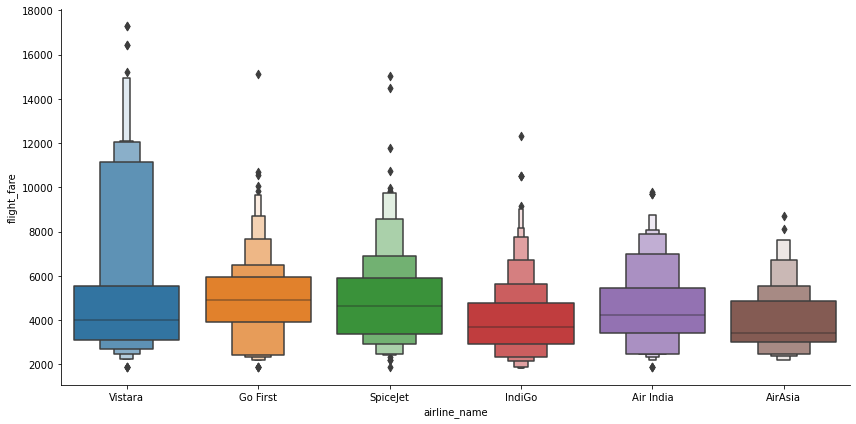

In [23]:
# Airline vs Price
sns.catplot(y = 'flight_fare', x = 'airline_name', data = df.sort_values("flight_fare", ascending = False), kind='boxen', height = 6, aspect = 2)
plt.show()

In [24]:
# Looking into flight_dep data
df['flight_dep'].value_counts()

New Delhi    736
Kolkata      467
Mumbai       356
Bangalore    336
Chennai       86
Guwahati      40
Name: flight_dep, dtype: int64

In [25]:
# Converting "flight_dep" from categorical data to numerical

origin = df[['flight_dep']]

origin = pd.get_dummies(origin, drop_first=True)

origin.head()

,flight_dep_Chennai,flight_dep_Guwahati,flight_dep_Kolkata,flight_dep_Mumbai,flight_dep_New Delhi
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [26]:
# Looking into flight_dep data
df['flight_arr'].value_counts()

Mumbai       655
New Delhi    582
Bangalore    314
Chennai      240
Kolkata      197
Guwahati      33
Name: flight_arr, dtype: int64

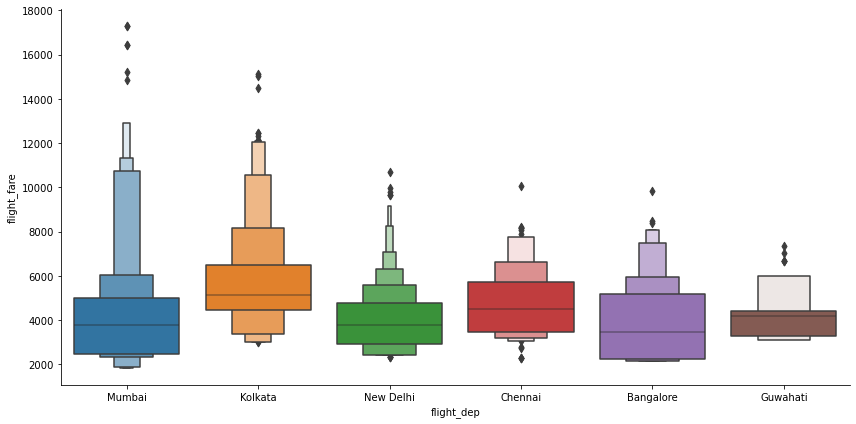

In [27]:
# Flight Departure vs Flight Fare

sns.catplot(y="flight_fare", x="flight_dep", data=df.sort_values("flight_fare", ascending=False), kind='boxen', height= 6, aspect=2)
plt.show()

In [28]:
# Converting "flight_arr" from categorical data to numerical

destination = df[['flight_arr']]

destination = pd.get_dummies(destination, drop_first=True)

destination.head()

,flight_arr_Chennai,flight_arr_Guwahati,flight_arr_Kolkata,flight_arr_Mumbai,flight_arr_New Delhi
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [29]:
# Concatenating all dataframes --> data + airline + origin + destiantion
full_data = pd.concat([df, airline, origin, destination], axis = 1)

# Dropping airline_name, flight_dep and flight_arr features
full_data.drop(["airline_name", "flight_dep", "flight_arr"], axis = 1, inplace = True)
full_data.head()

,total_stops,flight_fare,flight_day,flight_month,dep_hour,dep_min,arr_hour,arr_min,flight_time_hrs,flight_time_mins,...,flight_dep_Chennai,flight_dep_Guwahati,flight_dep_Kolkata,flight_dep_Mumbai,flight_dep_New Delhi,flight_arr_Chennai,flight_arr_Guwahati,flight_arr_Kolkata,flight_arr_Mumbai,flight_arr_New Delhi
0,1,3379,26,2,13,30,20,35,7,5,...,0,0,1,0,0,0,0,0,1,0
1,2,3379,26,2,9,5,22,15,13,10,...,0,0,1,0,0,0,0,0,1,0
2,1,3379,26,2,16,15,0,35,8,20,...,0,0,1,0,0,0,0,0,1,0
3,1,3379,26,2,23,40,6,35,6,55,...,0,0,1,0,0,0,0,0,1,0
4,1,3379,26,2,20,0,6,35,10,35,...,0,0,1,0,0,0,0,0,1,0


In [30]:
# Checking the amount of rows and columns in the dataframe
full_data.shape, 

((2021, 25),)

## Exploratory Data Analaysis

- Highest and lowest fare (More expensive or cheapest airline to flight with)
- Longest and shortest flight
- Cheapest

In [31]:
# Selecting features to check correlations
full_data.iloc[: , :10]

,total_stops,flight_fare,flight_day,flight_month,dep_hour,dep_min,arr_hour,arr_min,flight_time_hrs,flight_time_mins
0,1,3379,26,2,13,30,20,35,7,5
1,2,3379,26,2,9,5,22,15,13,10
2,1,3379,26,2,16,15,0,35,8,20
3,1,3379,26,2,23,40,6,35,6,55
4,1,3379,26,2,20,0,6,35,10,35
...,...,...,...,...,...,...,...,...,...,...
2016,2,15192,7,10,6,20,20,15,13,55
2017,2,16442,7,10,11,25,22,45,11,20
2018,2,16442,7,10,6,45,20,15,13,30
2019,2,17282,7,10,9,5,20,15,11,10


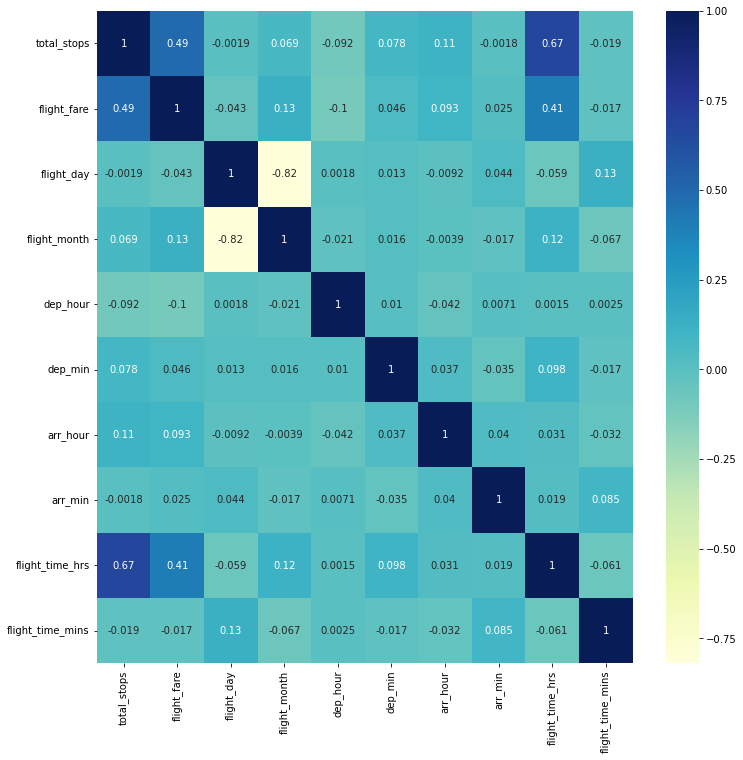

In [32]:
# Plotting the correlation between features
plt.figure(figsize = (12, 12))
sns.heatmap(full_data.iloc[: , :10].corr(), annot=True, cmap="YlGnBu")
plt.show()

Depandable feature to check which airline is the pick to fly with

- flight time hr / min
- fare
- flight date day / month
- total stops

found that the dependable are all variables but the one to predict

min 1841

4511.82

max 17282

0 - 1841
1841 -

In [33]:
# Creating a fare category feature and categorized the price in bins
# the numbers go from zero to 17282
full_data['fare_cat'] = pd.cut(full_data['flight_fare'], bins=[0, 2073.431268, 4146.862536, 6220.293803999999, 8293.725072,
10367.15634, 12440.587608, 14514.018876, 16587.450144, 17282., np.inf], labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

<AxesSubplot:>

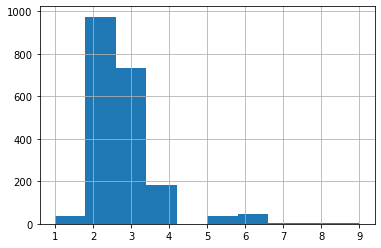

In [35]:
# Histogram of the fare categories
full_data['fare_cat'].hist()

In [36]:
# Splitting data in train and test
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_ids, test_ids in split.split(full_data, full_data['fare_cat']):
    train_data = full_data.loc[train_ids]
    test_data = full_data.loc[test_ids]

In [37]:
# Checking the outcome of sampling bias
test_data['fare_cat'].value_counts() / len(test_data)

2     0.481481
3     0.362963
4     0.091358
6     0.022222
5     0.019753
1     0.017284
7     0.002469
8     0.002469
9     0.000000
10    0.000000
Name: fare_cat, dtype: float64

In [38]:
train_data['fare_cat'].value_counts() / len(train_data)


2     0.482054
3     0.363243
4     0.089728
6     0.022896
5     0.019183
1     0.017327
8     0.003094
7     0.001238
9     0.001238
10    0.000000
Name: fare_cat, dtype: float64

In [40]:
# Removing the 'fare_cat' feature to return data to its original state
for set_ in (train_data, test_data):
    set_.drop('fare_cat', axis = 1, inplace=True)

### Looking of Correlations

Since the dataset is not too large, is easy to compute the standard correlation coefficient (also called `Pearson's r`) between every pair of features.

In [41]:
# Computing the standard correlation coefficient
corr_matrix = full_data.corr()

In [43]:
# Looking at how each attribute correlate with the meadian flight price
corr_matrix["flight_fare"].sort_values(ascending=False)

flight_fare              1.000000
total_stops              0.491216
flight_time_hrs          0.407412
flight_dep_Kolkata       0.324863
airline_name_Vistara     0.144593
flight_arr_New Delhi     0.136625
flight_month             0.128908
arr_hour                 0.092777
airline_name_Go First    0.085723
flight_arr_Chennai       0.071630
airline_name_SpiceJet    0.067708
dep_min                  0.045576
flight_dep_Chennai       0.025754
arr_min                  0.025007
flight_dep_Guwahati     -0.015156
flight_time_mins        -0.016801
flight_dep_Mumbai       -0.029260
flight_arr_Guwahati     -0.037326
flight_day              -0.042546
flight_arr_Kolkata      -0.050705
airline_name_AirAsia    -0.073870
dep_hour                -0.103654
flight_arr_Mumbai       -0.167417
flight_dep_New Delhi    -0.180513
airline_name_IndiGo     -0.192539
Name: flight_fare, dtype: float64

array([[<AxesSubplot:xlabel='flight_fare', ylabel='flight_fare'>,
        <AxesSubplot:xlabel='total_stops', ylabel='flight_fare'>,
        <AxesSubplot:xlabel='flight_time_hrs', ylabel='flight_fare'>,
        <AxesSubplot:xlabel='flight_month', ylabel='flight_fare'>],
       [<AxesSubplot:xlabel='flight_fare', ylabel='total_stops'>,
        <AxesSubplot:xlabel='total_stops', ylabel='total_stops'>,
        <AxesSubplot:xlabel='flight_time_hrs', ylabel='total_stops'>,
        <AxesSubplot:xlabel='flight_month', ylabel='total_stops'>],
       [<AxesSubplot:xlabel='flight_fare', ylabel='flight_time_hrs'>,
        <AxesSubplot:xlabel='total_stops', ylabel='flight_time_hrs'>,
        <AxesSubplot:xlabel='flight_time_hrs', ylabel='flight_time_hrs'>,
        <AxesSubplot:xlabel='flight_month', ylabel='flight_time_hrs'>],
       [<AxesSubplot:xlabel='flight_fare', ylabel='flight_month'>,
        <AxesSubplot:xlabel='total_stops', ylabel='flight_month'>,
        <AxesSubplot:xlabel='flight_time

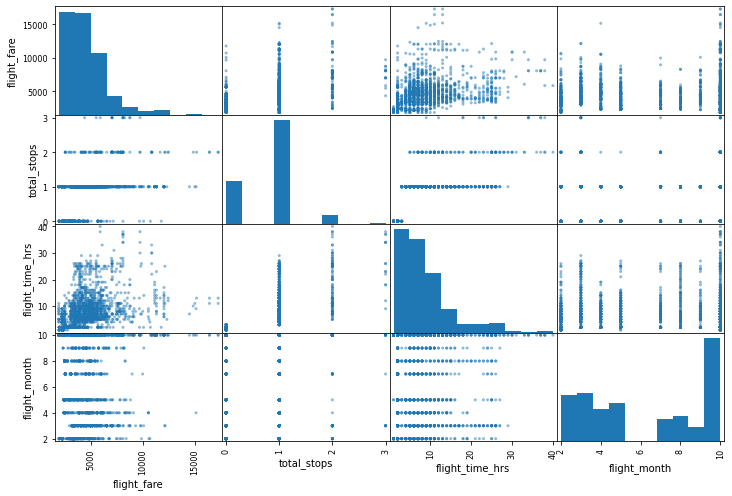

In [48]:
# scatter matrix
from pandas.plotting import scatter_matrix

atributes = ['flight_fare', 'total_stops', 'flight_time_hrs', 'flight_month']
scatter_matrix(full_data[atributes], figsize=(12, 8))

<AxesSubplot:xlabel='flight_time_hrs', ylabel='flight_fare'>

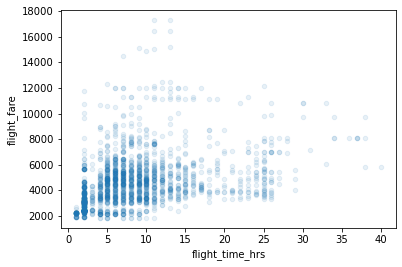

In [51]:
# Checking on the most correlated atributes
full_data.plot(kind='scatter', x='flight_time_hrs', y='flight_fare', alpha=0.1)

In this chart we can see that there are many outliers in the flight hours and this is due to the fact that in the dataset the "flight time" has the stop time include. Regardless of that we can see the strog correlation in flights from 1 to 10 hours.

## Data for Machine Learning Algorithms

In [52]:
# Separating predictors and label before applying transformations
full_data = train_data.drop('flight_fare', axis=1)
full_data_label = train_data['flight_fare'].copy()

In [ ]:
# Unique values check cell
unique_vals = df['airline_name'].unique()
print(f"There are {len(unique_vals)} unique elements in this feature : {unique_vals} ")